Pada dataset terdapat 8 kolom, yaitu:


*   gender = jenis kelamin (laki - laki / perempuan)
*   race/ethnicity = ras/etnis
*   parental level of education = tingkat pendidikan orangtua
*   lunch = makan siang (apakah siswa melakukan kegiatan makan siang atau tidak)
*   test preparation course	= pelajaran sebelum test (apakah siswa mengambil course sebelum ujian atau tidak)
*   math score = nilai ujian matematika
*   reading score = nilai ujian membaca
*   writing score = nilai ujian menulis

Saya akan menganalisa masing - masing kolom untuk komposisinya terhadap math score, readin score, dan writing score

---
Disini saya akan menghapus kolom `race/ethnicity`, karena tidak masuk akal untuk menentukan skor ujian berdasarkan ras.












In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import Data

In [2]:
from google.colab import files 
import io 


uploaded = files.upload()
 

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Cek missing value

In [46]:
df.isna().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Hapus kolom `race/ethnicity`

In [45]:
df.drop(columns=["race/ethnicity"], inplace=True)

# Korelasi kolom numerik satu sama lain

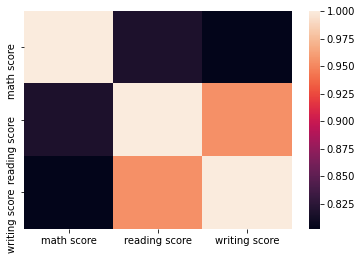

In [5]:
sns.heatmap(df.corr())

# Mengubah nilai skor ke dalam nilai predikat (A, B, C, D) untuk memudahkan analisa

In [14]:
def predikat_nilai(x):
  if x < 60:
    return 'D'
  elif x >= 60 and x <= 73 :
    return 'C'
  elif x > 73 and x <= 87:
    return 'B'
  elif x > 87 and x <= 100:
    return 'A'


df["math_score"] = df["math score"].apply(predikat_nilai)
df["reading_score"] = df["reading score"].apply(predikat_nilai)
df["writing_score"] = df["writing score"].apply(predikat_nilai)

df.drop(columns=['math score', 'reading score','writing score'], inplace=True)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,C,C,B
1,female,group C,some college,standard,completed,69,90,88,C,A,A
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,D,D
4,male,group C,some college,standard,none,76,78,75,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,A,A,A
996,male,group C,high school,free/reduced,none,62,55,55,C,D,D
997,female,group C,high school,free/reduced,completed,59,71,65,D,C,C
998,female,group D,some college,standard,completed,68,78,77,C,B,B


# Analisa nilai ketiga ujian (matematika, membaca, dan menulis) terhadap jenis kelamin siswa

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


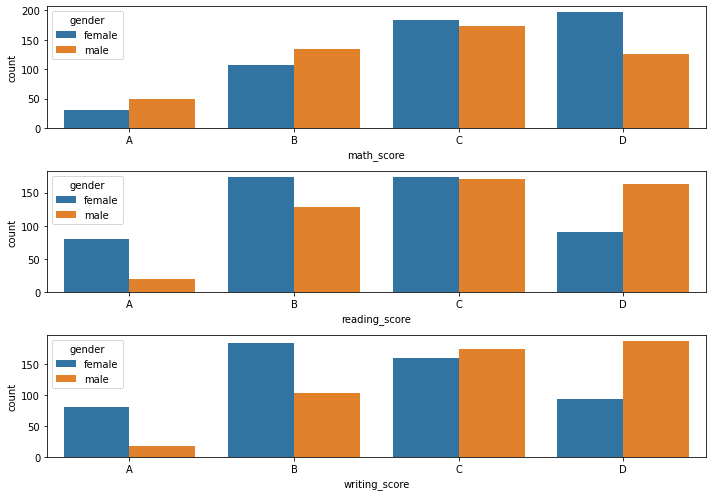

In [41]:
var_columns = ["math_score", "reading_score", "writing_score"]

fig, axes =plt.subplots(3, 1, figsize=(10,7))
for var_columns, ax in zip(var_columns, axes.flatten()):
  sns.countplot(var_columns, data=df, hue="gender", order= ["A", "B", "C", "D"], ax=ax)
  plt.tight_layout();

Diperoleh kesimpulan dari visualisasi diatas :

*   Untuk ujian matematika, semuanya berimbang. Hanya pada nilai D, siswa perempuan lebih banyak yang mendapat nilai D
*   Untuk ujian membaca, siswa perempuan lebih unggul terhadap siswa laki - laki
*   Untuk ujian menulis, siswa perempuan juga lebih unggul terhadap siswa laki - laki





# Analisa nilai ketiga ujian (matematika, membaca, dan menulis) terhadap Tingkat Pendidikan Orang Tua

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


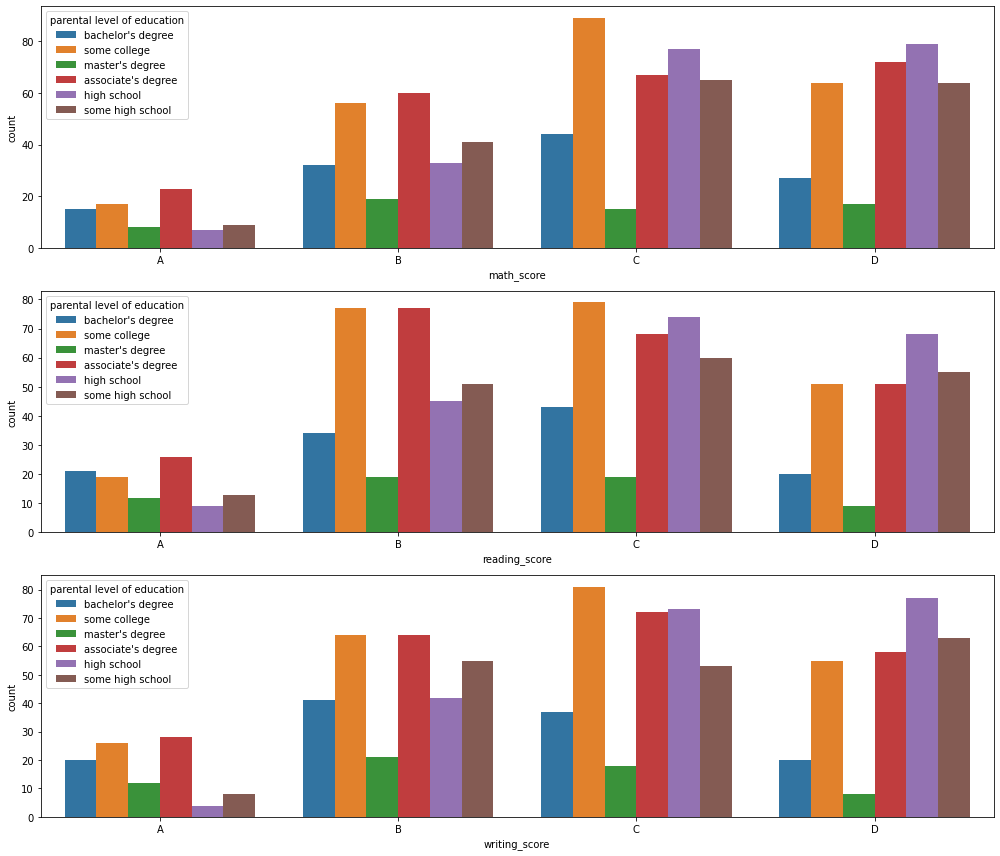

In [50]:
var_columns = ["math_score", "reading_score", "writing_score"]

fig, axes =plt.subplots(3, 1, figsize=(14,12))
for var_columns, ax in zip(var_columns, axes.flatten()):
  sns.countplot(var_columns, data=df, hue="parental level of education", order= ["A", "B", "C", "D"], ax=ax)
  plt.tight_layout();

Untuk siswa yang orangtua nya berpendidikan tinggi (S1, S2) cenderung memilik nilai ujian yang baik untuk ketiga mata pelajaran.

# Analisa nilai ketiga ujian (matematika, membaca, dan menulis) terhadap Kegiatan Makan Siang

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


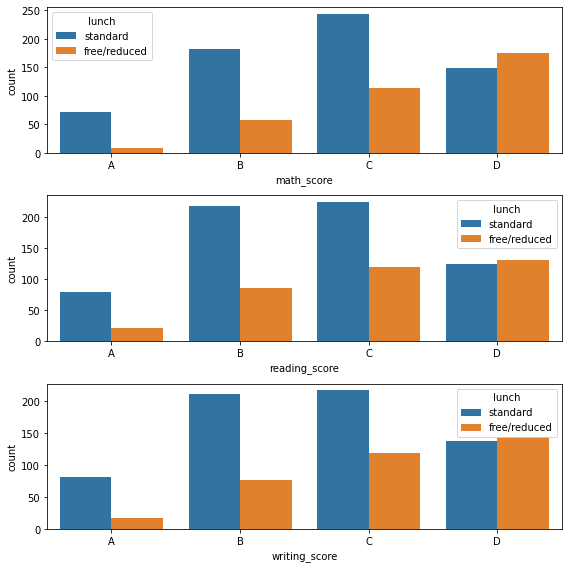

In [56]:
var_columns = ["math_score", "reading_score", "writing_score"]

fig, axes =plt.subplots(3, 1, figsize=(8,8))
for var_columns, ax in zip(var_columns, axes.flatten()):
  sns.countplot(var_columns, data=df, hue="lunch", order= ["A", "B", "C", "D"], ax=ax)
  plt.tight_layout();

Siswa yang melakukan makan siang cenderung mendapatkan nilai yang bagus

# Analisa nilai ketiga ujian (matematika, membaca, dan menulis) terhadap Pelajaran Persiapan Ujian

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


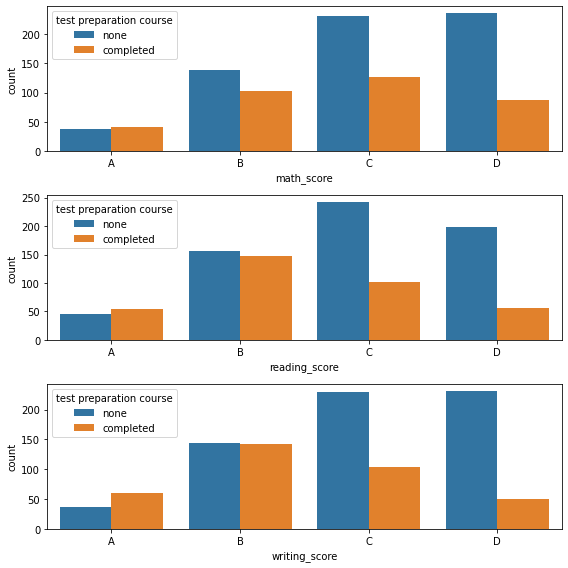

In [58]:
var_columns = ["math_score", "reading_score", "writing_score"]

fig, axes =plt.subplots(3, 1, figsize=(8,8))
for var_columns, ax in zip(var_columns, axes.flatten()):
  sns.countplot(var_columns, data=df, hue="test preparation course", order= ["A", "B", "C", "D"], ax=ax)
  plt.tight_layout();

Untuk siswa yang mengambil pelajaran tambahan untuk persiapan ujian cenderung meraih nilai bagus pada ketiga pelajaran, sendangkan untuk yang tidak, cenderung mendapat nilai yang tidak optimal